In [10]:
import random
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress
from citipy import citipy
import requests
import requests
import time
from datetime import datetime

#from config import weather_api_key

# Import API Keys from .env file
import os
from dotenv import load_dotenv
load_dotenv()
weather_api_key = os.getenv('weather_api_key')
g_key = os.getenv('g_key')

In [11]:
# Create a set of random latitude and longitudes combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-90.000, high=90.000, size=1500)
lats_lngs = zip(lats, lngs)
lats_lngs

In [12]:
# Creates variable to hold list of coordinates
coordinates = list(lats_lngs)
coordinates

[(45.58352542727488, -61.02268562362366),
 (-69.15396202902414, 32.63264733453141),
 (57.78039635630748, -83.29794693479613),
 (82.30554650492473, -55.61816557542607),
 (-7.0901805240496, 4.145228985557637),
 (13.251563274680905, -69.97698726683632),
 (-13.47146066112694, 10.049848968175723),
 (-74.71597653116399, 19.937555192942654),
 (40.067502623900396, 39.68034803146983),
 (39.5512762948772, 27.861159907018433),
 (-58.512991849160194, 41.66401825268014),
 (82.00986329134764, 10.419924947424406),
 (-41.27354853818828, 88.25337588648424),
 (-5.893697134559957, 79.09072426443944),
 (-62.11021907779035, -5.727373662784487),
 (-70.51993255334992, 18.26087089069901),
 (46.07539959362555, 34.90961691433202),
 (-62.41437601723602, 42.58464359316645),
 (-29.246917042165514, -9.547500873325504),
 (19.27909244696359, 69.74981047474219),
 (64.18915026733785, 10.95241583310002),
 (56.254112994198465, -48.21838398463165),
 (-27.66973399623788, 43.49851198553952),
 (63.721476254301166, 41.0182468

In [13]:
# Creates a list to hold cities.
cities = []

In [14]:
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # Only add unique cities to the list
    if city not in cities:
        cities.append(city)
        
# City count to confirm sufficient cities added.
len(cities)

618

In [16]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + "weather_api_key"

In [7]:
# Create an empty list to hold the weather data
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval   ")
print("---------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(1)

    # Create endpoint URL with each city
    city_url = url + "&q=" + city.replace(" ", "+")

    # Log the URL, record, and set numbers and the city
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to the record count
    record_count += 1

    # Run the APO request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        
        # Parse out the needed data
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
        
        # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
        


Beginning Data Retrieval   
---------------------------
Processing Record 1 of Set 1 | olafsvik
Processing Record 2 of Set 1 | hermanus
Processing Record 3 of Set 1 | edd
Processing Record 4 of Set 1 | jamestown
Processing Record 5 of Set 1 | kidal
Processing Record 6 of Set 1 | vila velha
Processing Record 7 of Set 1 | paragominas
Processing Record 8 of Set 1 | frankfort
Processing Record 9 of Set 1 | korgen
Processing Record 10 of Set 1 | kruisfontein
Processing Record 11 of Set 1 | kangaatsiaq
Processing Record 12 of Set 1 | longyearbyen
Processing Record 13 of Set 1 | port elizabeth
Processing Record 14 of Set 1 | ponta do sol
Processing Record 15 of Set 1 | ilulissat
Processing Record 16 of Set 1 | aflu
City not found. Skipping...
Processing Record 17 of Set 1 | havre-saint-pierre
Processing Record 18 of Set 1 | maltahohe
Processing Record 19 of Set 1 | punta arenas
Processing Record 20 of Set 1 | dourbali
Processing Record 21 of Set 1 | ushuaia
Processing Record 22 of Set 1 | ben

Processing Record 33 of Set 4 | poddorye
Processing Record 34 of Set 4 | klaksvik
Processing Record 35 of Set 4 | porto walter
Processing Record 36 of Set 4 | mahajanga
Processing Record 37 of Set 4 | harper
Processing Record 38 of Set 4 | comodoro rivadavia
Processing Record 39 of Set 4 | bafoulabe
Processing Record 40 of Set 4 | sioux lookout
Processing Record 41 of Set 4 | thompson
Processing Record 42 of Set 4 | vagur
Processing Record 43 of Set 4 | ostrovnoy
Processing Record 44 of Set 4 | keetmanshoop
Processing Record 45 of Set 4 | kumluca
Processing Record 46 of Set 4 | tiznit
Processing Record 47 of Set 4 | calvinia
Processing Record 48 of Set 4 | omutinskoye
City not found. Skipping...
Processing Record 49 of Set 4 | itarantim
Processing Record 50 of Set 4 | honningsvag
Processing Record 1 of Set 5 | priyutnoye
Processing Record 2 of Set 5 | newburn
Processing Record 3 of Set 5 | xuddur
Processing Record 4 of Set 5 | yendi
Processing Record 5 of Set 5 | salinopolis
Processing

Processing Record 28 of Set 8 | tursunzoda
Processing Record 29 of Set 8 | olavarria
Processing Record 30 of Set 8 | raudeberg
Processing Record 31 of Set 8 | tawkar
City not found. Skipping...
Processing Record 32 of Set 8 | rabo de peixe
Processing Record 33 of Set 8 | polyarnyy
Processing Record 34 of Set 8 | muisne
Processing Record 35 of Set 8 | rio grande
Processing Record 36 of Set 8 | tawzar
City not found. Skipping...
Processing Record 37 of Set 8 | shache
Processing Record 38 of Set 8 | sarakhs
Processing Record 39 of Set 8 | puerto berrio
Processing Record 40 of Set 8 | dubai
Processing Record 41 of Set 8 | belaya kholunitsa
Processing Record 42 of Set 8 | conceicao do araguaia
Processing Record 43 of Set 8 | demba
Processing Record 44 of Set 8 | sekondi
Processing Record 45 of Set 8 | san-pedro
Processing Record 46 of Set 8 | buerarema
Processing Record 47 of Set 8 | richards bay
Processing Record 48 of Set 8 | soldatskiy
City not found. Skipping...
Processing Record 49 of 

Processing Record 13 of Set 12 | odweyne
Processing Record 14 of Set 12 | alizai
Processing Record 15 of Set 12 | gonen
Processing Record 16 of Set 12 | loukhi
Processing Record 17 of Set 12 | notse
Processing Record 18 of Set 12 | asyut
Processing Record 19 of Set 12 | louisbourg
City not found. Skipping...
Processing Record 20 of Set 12 | salta
Processing Record 21 of Set 12 | mouzakion
City not found. Skipping...
Processing Record 22 of Set 12 | manakara
Processing Record 23 of Set 12 | galle
Processing Record 24 of Set 12 | juquia
Processing Record 25 of Set 12 | zambezi
Processing Record 26 of Set 12 | amparafaravola
Processing Record 27 of Set 12 | tal
Processing Record 28 of Set 12 | rocha
Processing Record 29 of Set 12 | sergeyevka
Processing Record 30 of Set 12 | stepnogorsk
Processing Record 31 of Set 12 | hofn
Processing Record 32 of Set 12 | cotia
Processing Record 33 of Set 12 | plettenberg bay
Processing Record 34 of Set 12 | kingisepp
Processing Record 35 of Set 12 | pue

In [87]:
# Determine the number of cities that made it into our list
len(city_data)

559

In [88]:
# Change our city_data list into a data frame
city_data_df = pd.DataFrame(city_data)

In [89]:
# Display the city data data frame
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Olafsvik,64.8945,-23.7142,52.05,76,99,2.57,IS,2022-07-18 15:11:24
1,Hermanus,-34.4187,19.2345,57.79,83,99,5.73,ZA,2022-07-18 15:08:41
2,Edd,13.9297,41.6925,93.58,56,1,13.35,ER,2022-07-18 15:11:25
3,Jamestown,42.0970,-79.2353,73.51,85,100,14.97,US,2022-07-18 15:06:01
4,Kidal,18.4411,1.4078,100.56,25,32,4.32,ML,2022-07-18 15:11:25
5,Vila Velha,-20.3297,-40.2925,82.35,72,40,9.22,BR,2022-07-18 15:05:42
6,Paragominas,-2.9667,-47.4833,89.26,48,55,3.58,BR,2022-07-18 15:11:26
7,Frankfort,-27.2667,28.4833,58.68,20,0,4.14,ZA,2022-07-18 15:11:26
8,Korgen,66.0771,13.8153,53.92,91,100,4.27,NO,2022-07-18 15:11:27
9,Kruisfontein,-34.0033,24.7314,63.88,79,4,7.02,ZA,2022-07-18 15:11:27


In [90]:
# Variable to rearrange order of data frame columns
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", 
                    "Humidity", "Cloudiness", "Wind Speed"]

In [91]:
city_data_df[new_column_order]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Olafsvik,IS,2022-07-18 15:11:24,64.8945,-23.7142,52.05,76,99,2.57
1,Hermanus,ZA,2022-07-18 15:08:41,-34.4187,19.2345,57.79,83,99,5.73
2,Edd,ER,2022-07-18 15:11:25,13.9297,41.6925,93.58,56,1,13.35
3,Jamestown,US,2022-07-18 15:06:01,42.0970,-79.2353,73.51,85,100,14.97
4,Kidal,ML,2022-07-18 15:11:25,18.4411,1.4078,100.56,25,32,4.32
...,...,...,...,...,...,...,...,...,...
554,Aromashevo,RU,2022-07-18 15:15:30,56.8602,68.6375,67.06,76,63,6.35
555,Baracoa,CU,2022-07-18 15:15:31,20.3467,-74.4958,85.26,68,93,12.75
556,Lucan,IE,2022-07-18 15:15:31,53.3592,-6.4389,87.89,43,0,11.50
557,Kuruman,ZA,2022-07-18 15:15:32,-27.4524,23.4325,63.99,35,0,11.90


In [92]:
# Create the output file (CSV)
output_data_file = "weather_data/cities.csv"
# Export the city data into a csv
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [93]:
# Extract relevant fields from the dataframe for plotting
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [94]:
# Get today's date in seconds.
today = time.strftime("%x")
today

'07/18/22'

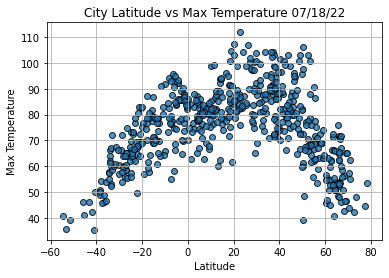

In [95]:
# Build scatter plot for lat vs max temp
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs Max Temperature " + time.strftime("%x"))
plt.ylabel("Max Temperature")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig1.png")

plt.show()
plt.close()

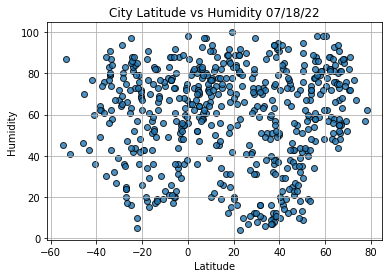

In [96]:
# Build scatter plot for lat vs humidity
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs Humidity " + time.strftime("%x"))
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig1.png")

plt.show()
plt.close()

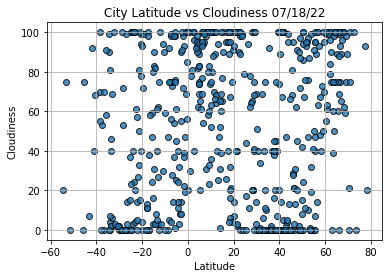

In [97]:
# Build scatter plot for lat vs max temp
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs Cloudiness " + time.strftime("%x"))
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig1.png")

plt.show()
plt.close()

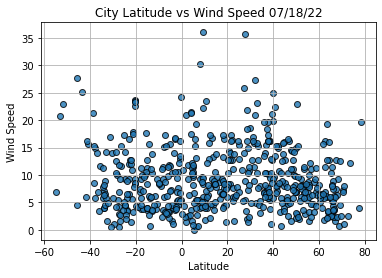

In [98]:
# Build scatter plot for lat vs max temp
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs Wind Speed " + time.strftime("%x"))
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig1.png")

plt.show()
plt.close()

### Linear Regression Practice

In [99]:
# Create an equal number of latitudes and temperatures.
lats = [42.5, 43.9, 8.1, 36.8, 79.9, 69.1, 25.7, 15.3, 12.7, 64.5]
temps = [80.5, 75.3, 90.9, 90.0, 40.4, 62.3, 85.4, 79.6, 72.5, 72.0]

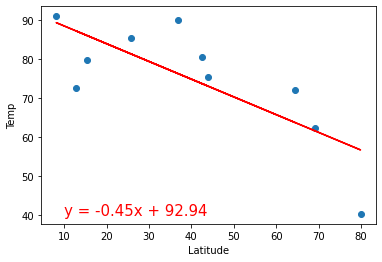

In [100]:
# Perform linear regression
(slope, intercept, r_value, p_value, std_err) = linregress(lats,temps)

# Calculate the regression line "y values" from the slope and intercept
regress_values = [(lat * slope + intercept) for lat in lats]

# Get the equation of the line
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

# Import Matplotlib.
import matplotlib.pyplot as plt

# Create a scatter plot of the x and y values.
plt.scatter(lats,temps)

# Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
plt.plot(lats,regress_values,"r")

# Annotate the text for the line equation and add its coordinates.
plt.annotate(line_eq, (10,40), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Temp')
plt.show()

### Create Linear Regression Function

In [119]:
# Create a function to perform linear regression on the weather data
# and plot a regression line and the equation with the data.

# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Print statistical information
    print(f'The r-value is {r_value}')
    print(f'The p-value is {p_value}')
    print(f'The standard error is {std_err}')

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [102]:
# Using loc method to identify data from a single row
row = city_data_df.loc[10]
row

City                  Kangaatsiaq
Lat                       68.3065
Lng                      -53.4641
Max Temp                    42.55
Humidity                       87
Cloudiness                     62
Wind Speed                   9.33
Country                        GL
Date          2022-07-18 15:11:27
Name: 10, dtype: object

In [103]:
# Finding all rows that fit a specific parameter.
city_data_df["Lat"] >= 0

0       True
1      False
2       True
3       True
4       True
       ...  
554     True
555     True
556     True
557    False
558     True
Name: Lat, Length: 559, dtype: bool

In [104]:
# Search through the data frame to pull out all data frame data
# that meat a specific parameter
northern_hemi_df = city_data_df[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df[(city_data_df["Lat"] <= 0)]

The r-value is -0.49843526181080167
The p-value is 4.5398557334192295e-25
The standard error is 0.03183634796887871


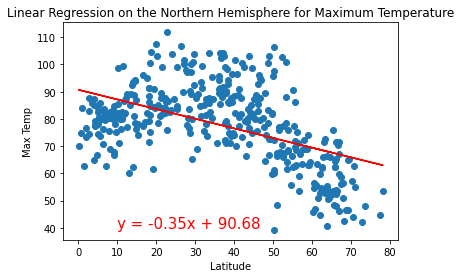

In [120]:
# Linear regression on the Northern Hemisphere Lat vs Temp
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Call the function
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Northern Hemisphere for Maximum Temperature', 'Max Temp', (10,40))

The r-value is 0.8104586359432628
The p-value is 1.1430536221515937e-43
The standard error is 0.0463385761095341


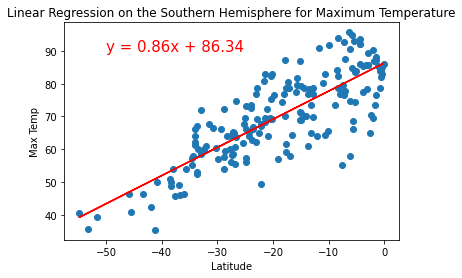

In [121]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

# Call the function
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Southern Hemisphere for Maximum Temperature', 'Max Temp', (-50,90))

The r-value is -0.02285450694285067
The p-value is 0.6582443074289333
The standard error is 0.06168572782759841


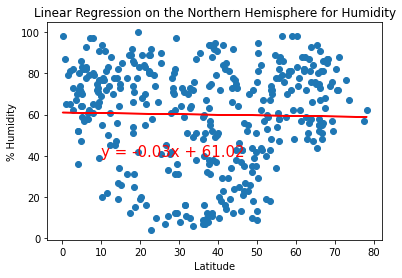

In [127]:
# Linear regression on the Northern Hemisphere Lat vs Humidity
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

# Call the function
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Northern Hemisphere for Humidity', '% Humidity', (10,40))

The r-value is -0.08934466916750204
The p-value is 0.2303642305862151
The standard error is 0.1321192468296437


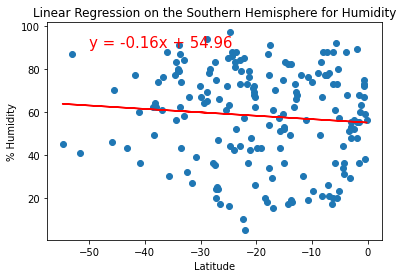

In [126]:
# Linear regression on the Southern Hemisphere Lat vs Humidity
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

# Call the function
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Southern Hemisphere for Humidity', '% Humidity', (-50,90))

The r-value is -0.06295784064600057
The p-value is 0.22262754518110245
The standard error is 0.0972963621574561


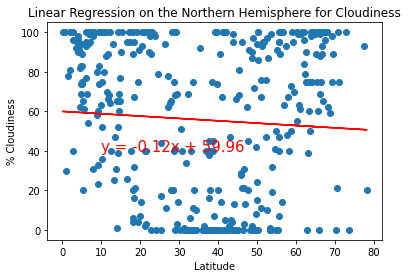

In [128]:
# Linear regression on the Northern Hemisphere Lat vs Cloudiness
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

# Call the function
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Northern Hemisphere for Cloudiness', '% Cloudiness', (10,40))

The r-value is 0.16493026272819558
The p-value is 0.02608390556695645
The standard error is 0.22110293276818543


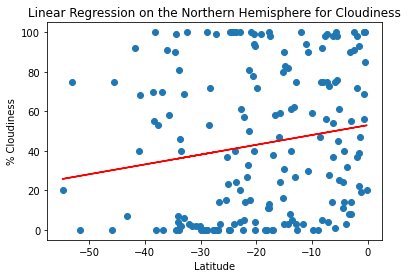

In [129]:
# Linear regression on the Southern Hemisphere Lat vs Cloudiness
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

# Call the function
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Northern Hemisphere for Cloudiness', '% Cloudiness', (10,40))

The r-value is -0.14593634234739117
The p-value is 0.0045201583484020735
The standard error is 0.014188158241366896


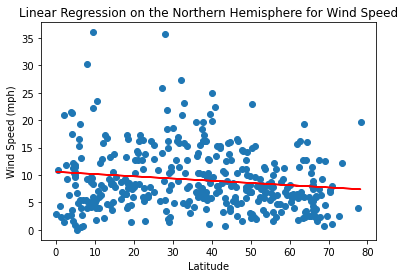

In [130]:
# Linear regression on the Northern Hemisphere Lat vs Wind Speed
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

# Call the function
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed (mph)', (10,40))

The r-value is -0.16019841345884261
The p-value is 0.030751312026870332
The standard error is 0.03308408668571231


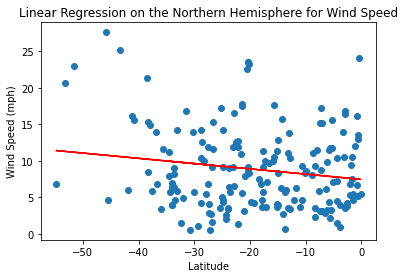

In [131]:
# Linear regression on the Southern Hemisphere Lat vs Wind Speed
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

# Call the function
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed (mph)', (10,40))